## Brief

Here we create an algorithm to test for balance in signed, undirected, possibly incomplete networks.

We manually create two small networks to test our algorithm.

In [19]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline 

## Generate graphs

Make graphs manually

In [21]:
N1 = nx.Graph()

In [22]:
N2 = nx.Graph()

In [23]:
N1.add_edges_from([(4,9),(4,7), (4,2),(5,6),(3,6),(6,11),(8,11),(11,10),(11,13),(11,14),(14,15),(15,13)], weight = -1)

In [24]:
N1.add_edges_from([(12,9),(12,7), (12,10),(12,13),(6,8),(2,1),(2,3),(2,5),(1,3)], weight = 1)

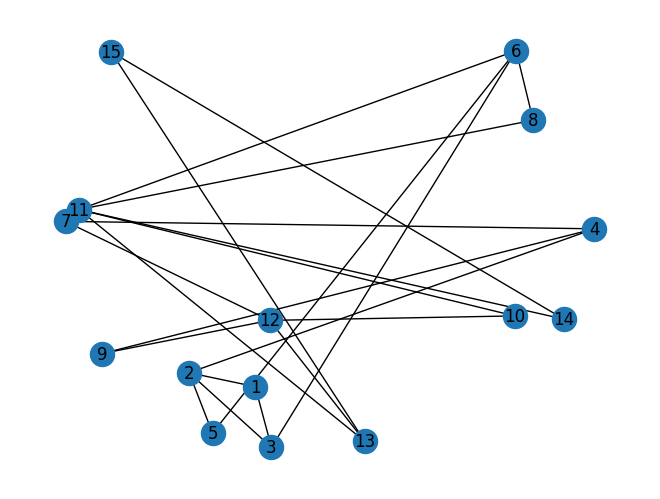

In [25]:
nx.draw(N1, with_labels = True)

In [26]:
N2.add_edges_from([(4,9),(4,7),(5,6),(3,6),(6,11),(8,11),(11,10),(11,13),(11,14),(14,15),(15,13)], weight = -1)

In [27]:
N2.add_edges_from([(12,9),(12,7), (12,10),(4,2),(12,13),(6,8),(2,1),(2,3),(2,5),(1,3)], weight = 1)

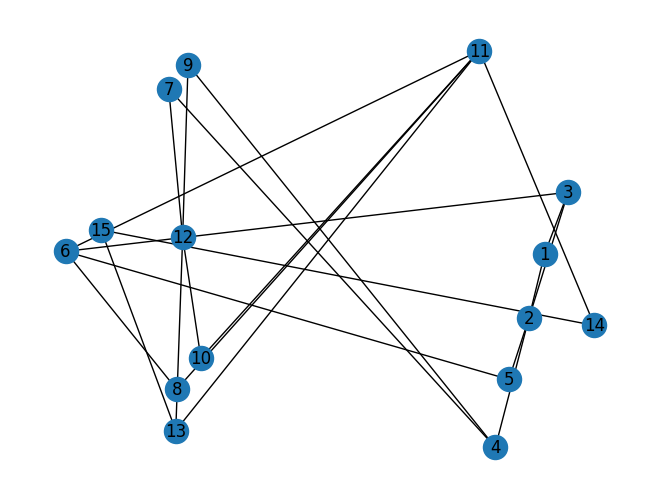

In [28]:
nx.draw(N2, with_labels = True)

## Define algorithm for balance test for signed undirected network

In [29]:
def BalanceTest(N1):

    # Consider subgraphs with only + edges
    # Empty list for edges to be removed
    edges_to_remove = []

    # Go through every edge and collect edges that have negative edges
    for u, v, data in N1.edges(data = True):
        if data.get('weight', 0) < 0:
            edges_to_remove.append((u, v))
        
    # Remove negative edges
    for u, v in edges_to_remove:
        N1.remove_edge(u, v)

    # Collect clusters with nodes
    clust_list = list(nx.connected_components(N1))

    # create superclusters
    supercluster_partition = {}
    supercluster_id = 0

    for cluster in clust_list:
        for node in cluster:
            supercluster_partition[node] = supercluster_id
        supercluster_id += 1

    superclusters = nx.Graph()
    superclusters.add_nodes_from(list(supercluster_partition.values()))
    for edge in edges_to_remove:
        superclusters.add_edge(supercluster_partition[edge[0]],supercluster_partition[edge[1]])

    # Add negative edges back
    N1.add_edges_from(edges_to_remove, weight = -1)

    # Create subgraphs based on cluster list and store these on a list
    subgraphs = []

    for i, cluster in enumerate(clust_list):
        subgraph = N1.subgraph(cluster)
        subgraphs.append(subgraph)

    # Create function to check if negative edges exists
    def has_neg_edge(graph):
        for u, v, data in graph.edges(data=True):
            if data.get('weight', 0) < 0:
                return True
        return False

    # Check if negative edges exists within clusters
    for i, subgraph in enumerate(subgraphs):
        if has_neg_edge(subgraph):
            return False

    # Check if layers are connected
    layers = list(nx.bfs_layers(superclusters, 0))

    for edge in superclusters.edges():
        for layer in layers:
            if edge[0] in layer and edge[1] in layer:
                nx.draw(superclusters, with_labels = True)
                return False
    return True

## Here you can use the algorithm

False

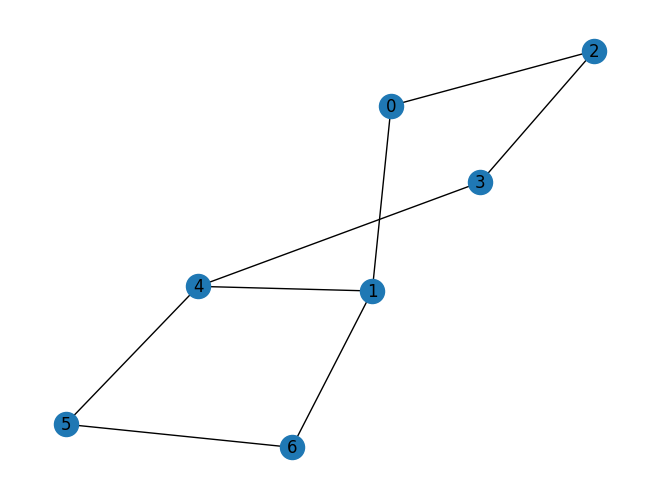

In [30]:
BalanceTest(N1)

In [31]:
BalanceTest(N2)

True